In [5]:
import pandas as pd
import numpy as np
import re
import random

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
labels = ['action', 'adventure', 'crime', 'family', 'fantasy', 'horror', 'mystery', 'romance', 'scifi', 'thriller']
def process_data(text):
    word = text.lower()
    word = re.sub(r'[^\w\s]', '', word)
    if word not in labels:
        word = random.choice(labels)
    return word

In [22]:
def confusion(true_labels, predicted_labels):
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    sns.heatmap(conf_matrix,
            annot=True,
            fmt='g',
            xticklabels=labels,
            yticklabels=labels)
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('LSTM',fontsize=17)
    plt.show()

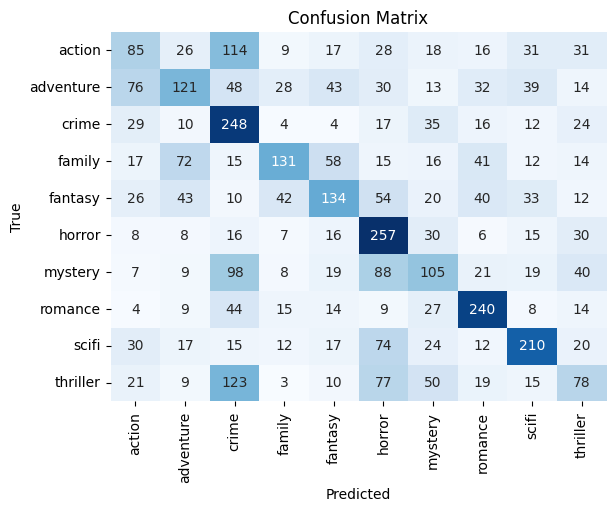

In [23]:
data = pd.read_csv('data/chatgpt_responses.csv')
data = data[['genre', 'prediction']]
data['prediction'] = data['prediction'].apply(process_data)

confusion(data['genre'], data['prediction'])